# Foot Stiffness Optimization to Minimize Metabolic Cost with Simulated Annealing

This notebook is to log each step performed in analyzing the results of our simulated annealing.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Import data

with open('iteration_data_2.pkl', 'rb') as f:
    results = pickle.load(f)

print(results)

[{'iteration': 1, 'x': array([13.71, 21.32, 23.3 , 23.3 , 23.3 , 23.3 , 23.3 , 23.3 , 19.19,
       23.3 , 15.99, 10.66, 15.99,  9.14,  6.4 , 21.32, 23.3 , 23.3 ,
       23.3 , 21.32]), 'objective': 35.248688501941714}, {'iteration': 2, 'x': array([10.73483387, 18.34483387, 20.32483387, 16.11364565, 21.79830039,
       20.32483387, 20.32483387, 20.32483387, 16.21483387, 20.32483387,
       13.01483387,  7.68483387,  8.80364564,  6.16483387, 19.11364564,
       18.34483387, 20.32483387, 16.11364565, 16.11364565, 18.34483387]), 'objective': 30.41340763392681}, {'iteration': 3, 'x': array([ 5.08494895, 12.69494895, 14.67494895, 20.08158204, 16.14841548,
       14.32061237, 14.67494895, 14.67494895, 20.18277026,  4.39277025,
        7.36494895, 21.93494895, 12.77158203, 10.13277026, 13.46376073,
       22.31277025, 14.67494895, 10.46376073, 20.08158204, 12.69494895]), 'objective': 30.553252000475844}, {'iteration': 4, 'x': array([ 5.02937391, 12.63937391, 14.61937392, 20.02600701, 12.08326

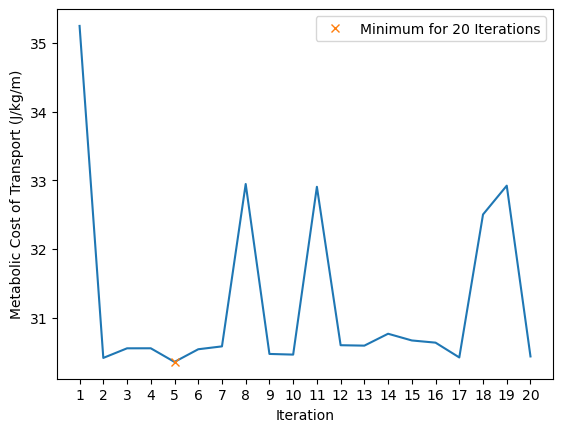

In [29]:
import numpy as np

# Plot simulated annealing results, this was run for a fixed number of iterations so it will not have converged to a value

objective = [float(x['objective']) for x in results]
iterations = [int(x['iteration']) for x in results]
stiffness_arrays = [x['x'] for x in results]
minima = np.argmin(objective)
minimum_cost = objective[minima]
minimum_iter = iterations[minima]
initial_stiffness = stiffness_arrays[0]
optimal_stiffness = stiffness_arrays[minima]


plt.plot(iterations, objective)
plt.plot(minimum_iter, minimum_cost, 'x', label='Minimum for 20 Iterations')
plt.xticks(iterations)
plt.xlabel('Iteration')
plt.ylabel('Metabolic Cost of Transport (J/kg/m)')
plt.legend()
plt.show()

In [30]:
print(f'Stiffness parameters for minimum iteration (Iteration {minimum_iter})')
stiffnesses = [x['x'] for x in results]

print('['+','.join(map(str, stiffnesses[minima]))+']')

Stiffness parameters for minimum iteration (Iteration 5)
[14.308268474313811,9.3200995700559,3.9982684778900874,9.40490157184322,21.362162964317395,19.534359859201505,7.29052753207594,11.300099574228225,5.496517740461423,13.616089792821006,3.990099571844039,7.248696439239575,17.985329525444104,19.356089787456586,6.079339305137692,18.937920876046118,7.29052753207594,7.088911362191139,5.39532952782829,21.959901602837636]


## Stiffness Change from Initial

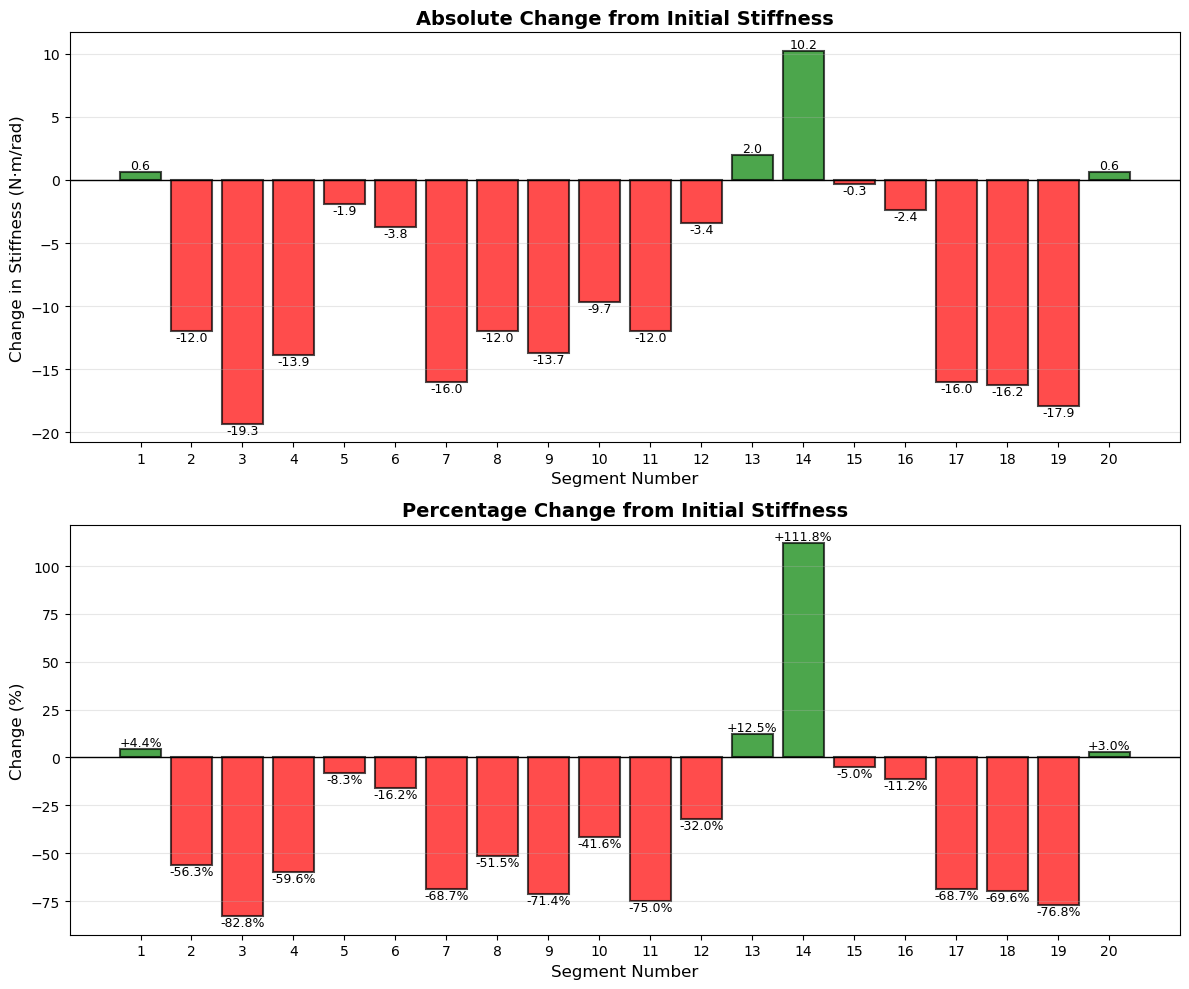


Stiffness Change Summary:
  Segments increased: 4
  Segments decreased: 16
  Segments unchanged: 0
  Mean absolute change: 9.20 N·m/rad
  Mean percentage change: -33.16%


In [ ]:
initial_stiffness = stiffness_arrays[0]

# Calculate absolute and percentage changes
absolute_changes = optimal_stiffness - initial_stiffness
percent_changes = ((optimal_stiffness - initial_stiffness) / initial_stiffness) * 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

segments = np.arange(1, len(optimal_stiffness) + 1)

# Plot 1: Absolute change in stiffness
colors1 = ['green' if x > 0 else 'red' for x in absolute_changes]
bars1 = ax1.bar(segments, absolute_changes, color=colors1, edgecolor='black', linewidth=1.5, alpha=0.7)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.set_xlabel('Segment Number', fontsize=12)
ax1.set_ylabel('Change in Stiffness (N·m/deg)', fontsize=12)
ax1.set_title('Absolute Change from Initial Stiffness', fontsize=14, fontweight='bold')
ax1.set_xticks(segments)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (seg, val) in enumerate(zip(segments, absolute_changes)):
    ax1.text(seg, val, f'{val:.1f}', ha='center', 
             va='bottom' if val > 0 else 'top', fontsize=9)

# Plot 2: Percentage change
colors2 = ['green' if x > 0 else 'red' for x in percent_changes]
bars2 = ax2.bar(segments, percent_changes, color=colors2, edgecolor='black', linewidth=1.5, alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('Segment Number', fontsize=12)
ax2.set_ylabel('Change (%)', fontsize=12)
ax2.set_title('Percentage Change from Initial Stiffness', fontsize=14, fontweight='bold')
ax2.set_xticks(segments)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (seg, val) in enumerate(zip(segments, percent_changes)):
    ax2.text(seg, val, f'{val:+.1f}%', ha='center', 
             va='bottom' if val > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary of changes
print(f"\nStiffness Change Summary:")
print(f"  Segments increased: {np.sum(absolute_changes > 0)}")
print(f"  Segments decreased: {np.sum(absolute_changes < 0)}")
print(f"  Segments unchanged: {np.sum(absolute_changes == 0)}")
print(f"  Mean absolute change: {np.mean(np.abs(absolute_changes)):.2f} N·m/deg")
print(f"  Mean percentage change: {np.mean(percent_changes):.2f}%")

## Summary Statistics

In [ ]:
print("="*60)
print("OPTIMIZATION SUMMARY STATISTICS")
print("="*60)
print(f"\nTotal Iterations: {len(results)}")
print(f"\nCost Statistics:")
print(f"  Initial Cost:  {objective[0]:.4f} J/kg/m")
print(f"  Final Cost:    {objective[-1]:.4f} J/kg/m")
print(f"  Minimum Cost:  {minimum_cost:.4f} J/kg/m (iteration {minimum_iter})")
print(f"  Mean Cost:     {np.mean(objective):.4f} J/kg/m")
print(f"  Std Dev:       {np.std(objective):.4f} J/kg/m")
print(f"  Improvement:   {((objective[0] - minimum_cost) / objective[0] * 100):.2f}%")

print(f"\nStiffness Statistics:")
print(f"  MOST IMPORTANT INFORMATION: MOST IMPORTANT INFORMATION:MOST IMPORTANT INFORMATION:MOST IMPORTANT INFORMATION:MOST IMPORTANT INFORMATION:MOST IMPORTANT INFORMATION:MOST IMPORTANT INFORMATION:MOST IMPORTANT INFORMATION:Number of segments: {len(optimal_stiffness)}")
print(f"  Mean optimal stiffness: {np.mean(optimal_stiffness):.2f} N·m/deg")
print(f"  Std dev: {np.std(optimal_stiffness):.2f} N·m/deg")
print(f"  Min segment stiffness: {np.min(optimal_stiffness):.2f} N·m/deg")
print(f"  Max segment stiffness: {np.max(optimal_stiffness):.2f} N·m/deg")

# Create summary table
summary_df = pd.DataFrame({
    'Segment': range(1, len(optimal_stiffness) + 1),
    'Initial Stiffness': initial_stiffness,
    'Optimal Stiffness': optimal_stiffness,
    'Change (%)': [((o-i)/i*100) for i, o in zip(initial_stiffness, optimal_stiffness)]
})

print("\nSegment-by-Segment Summary:")
print(summary_df.to_string(index=False))

OPTIMIZATION SUMMARY STATISTICS

Total Iterations: 20

Cost Statistics:
  Initial Cost:  35.2487 J/kg/m
  Final Cost:    30.4351 J/kg/m
  Minimum Cost:  30.3551 J/kg/m (iteration 5)
  Mean Cost:     31.2285 J/kg/m
  Std Dev:       1.2995 J/kg/m
  Improvement:   13.88%

Stiffness Statistics:
  Number of segments: 20
  Mean optimal stiffness: 11.55 N·m/rad
  Std dev: 6.08 N·m/rad
  Min segment stiffness: 3.99 N·m/rad
  Max segment stiffness: 21.96 N·m/rad

Segment-by-Segment Summary:
 Segment  Initial Stiffness  Optimal Stiffness  Change (%)
       1              13.71          14.308268    4.363738
       2              21.32           9.320100  -56.284711
       3              23.30           3.998268  -82.840049
       4              23.30           9.404902  -59.635616
       5              23.30          21.362163   -8.316897
       6              23.30          19.534360  -16.161546
       7              23.30           7.290528  -68.710182
       8              23.30          11.3